# Opinion Mining-British Airways

In [216]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [217]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chene\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [218]:
!python -m spacy download en_core_web_sm


     -------------------------------------- 12.8/12.8 MB 967.9 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [219]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [220]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chene\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [221]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [222]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


# Functions to use

In [223]:
def sentence(List):
    ch=''
    for i in range(0,len(List)):
        ch=List[i]+ch
    return(ch)
        

In [224]:
def count(List):
    pos=0
    for i in range(0,len(train)):
        if('pos' in train[i]):
            pos=pos+1
    return(pos)

# I-Libraries Importing

In [225]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import string
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
from datetime import datetime
from textblob.classifiers import NaiveBayesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import spacy

# II- Data Scraping: Reviwes,Rating,Publish_Year

In [458]:
reviews=[]
Rating=[]
publish_year=[]

In [459]:
base_url='''https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=100'''
for i in range(2,45):
    page=requests.get(base_url)
    soup=BeautifulSoup(page.content)
    List=soup.find('div',id='container').find_all('article',itemprop="review")
    for elem in List:
        if(elem.find('span',itemprop="ratingValue")!=None):
            z=elem.find('h2',class_="text_header").text.split('h2')[-1]
            if(z!='British Airways customer review'):
                x=elem.find('span',itemprop="ratingValue").text.split('span')[-1]
                Rating.append(int(x))
                y=str(elem.find('time'))
                y=y.split('datetime=')[-1].split('"')[1]
                date_=datetime.strptime(y, '%Y-%m-%d').date()
                publish_year.append(date_.year)
                reviews.append(z)
    base_url=f'''https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100'''
        

In [460]:
reviews=pd.Series(reviews)
Rating=pd.Series(Rating)
publish_year=pd.Series(publish_year)

In [461]:
df=pd.DataFrame(columns=['reviews','Rating','publish_year'])
df['reviews']=reviews
df['Rating']=Rating
df['publish_year']=publish_year

In [462]:
df

,reviews,Rating,publish_year
0,"""premium price for very average service""",5,2023
1,"""lack of customer service""",1,2023
2,"""Overall not a good airline""",2,2023
3,"""delayed and missed connecting flight""",1,2023
4,"""!not a good experience""",1,2023
...,...,...,...
2576,"""need to up their game""",3,2015
2577,"""our last flight with British Airways""",1,2015
2578,"""supposed legacy airline""",2,2015
2579,"""staff amiable and present""",7,2015


# III-Data Analysis

### 1-Mean value

In [12]:
df['Rating'].mean() # below average

4.452925222781867

> The mean score of the total ratings is 4.47 which is below average 

### 2-Reviews Compared to the Rating

In [48]:
df_rating_count = df.groupby('Rating').count()

In [49]:
col_map = plt.get_cmap('Paired')

Text(0.5, 1.0, 'The reviews compared to the Rating')

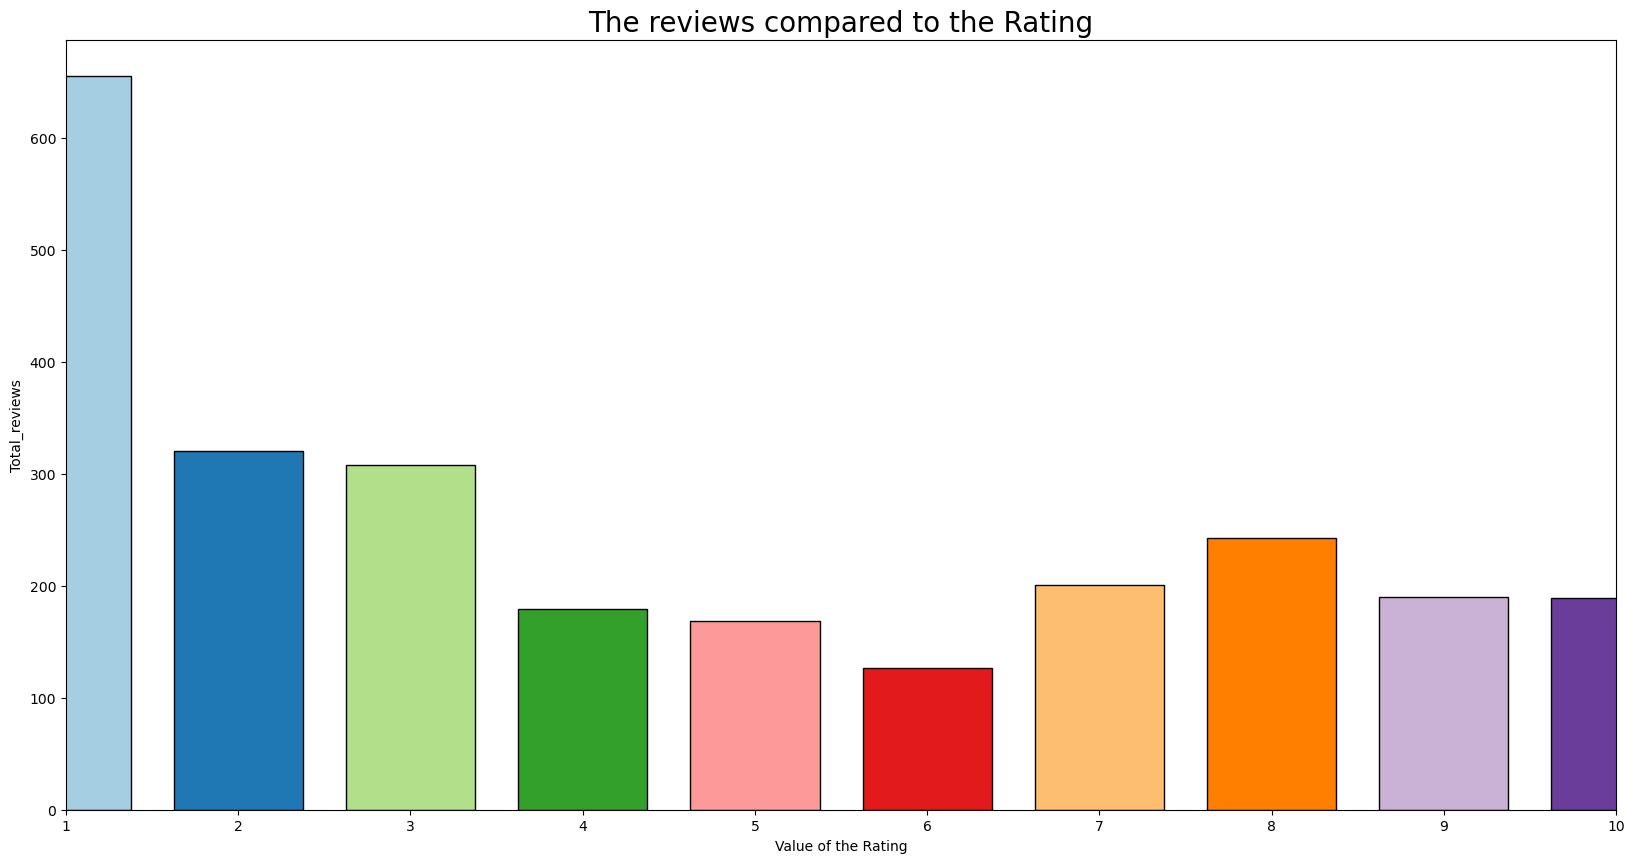

In [50]:
plt.figure(figsize=(20,10))
plt.bar(df_rating_count.index,df_rating_count['reviews'],width=0.75, color=col_map.colors, edgecolor='k')
plt.xlim(1,10)
plt.xlabel('Value of the Rating')
plt.ylabel('Total_reviews')
plt.title('The reviews compared to the Rating',fontsize=20 )

### 3-Evolution of the rating over the years Chart

Text(0.5, 1.0, 'Evolution of the rating over the Years')

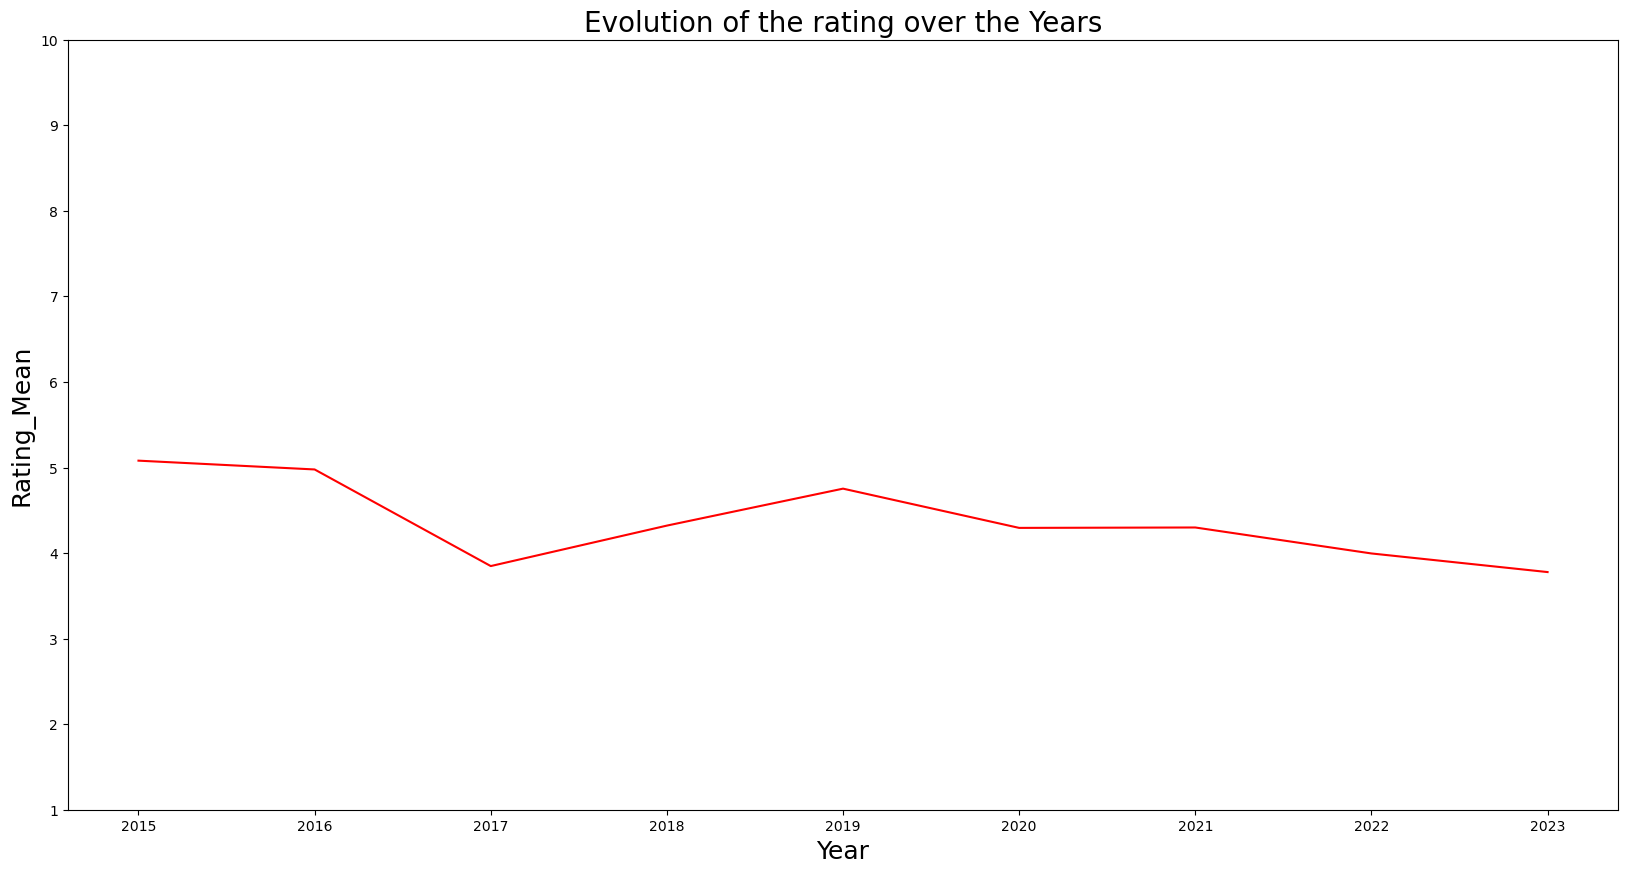

In [51]:
df_year=df.groupby('publish_year').mean()
plt.figure(figsize=(20,10))
axes = pyplot.gca() 
plt.plot(df_year.index,df_year['Rating'],c='r')
plt.xlabel("Year",fontsize=18)
plt.ylabel("Rating_Mean",fontsize=18)
plt.ylim(1,10)
plt.title('Evolution of the rating over the Years', fontsize=20 )

>>There is no great change in the reviews over the years, they are approximately in the same range. 

# IV- Sentiment analysis:Static Explanation

### 1-Frequent words: WordCloud

In [52]:
content_review=''
for i in range(0,len(df['reviews'])):
    content_review=reviews[i]+''+content_review

In [88]:
from wordcloud import WordCloud,STOPWORDS

In [89]:
from PIL import Image

In [90]:
STOPWORDS_extra=['a','British Airways','seats','flight','BA','staff','service','food','crew','experience','Seat','airline','cabin','crew' 'about','British','Airways','above','after', 'again', 'against', 'all', 'also', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because','been','before','being','below','between','both', 'but', 'by', 'can', "can't", 'cannot', 'com', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'else', 'ever', 'few', 'for', 'from', 'further', 'get', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'hence', 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'however', 'http', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', 'just', 'k', "let's", 'like', 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'otherwise', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'r', 'same', 'shall', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'since', 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', "there's", 'therefore', 'these', 'they', "they'd", "they'll", "they're", "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', "wasn't", 'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where', "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's", 'with', "won't", 'would', "wouldn't",'www','you',"you'd","you'll","you're", "you've",'your','yours','yourself','yourselves','not','really','another','will','customer']

In [104]:
mask=np.array(Image.open('Downloads/plane_2.jpg'))

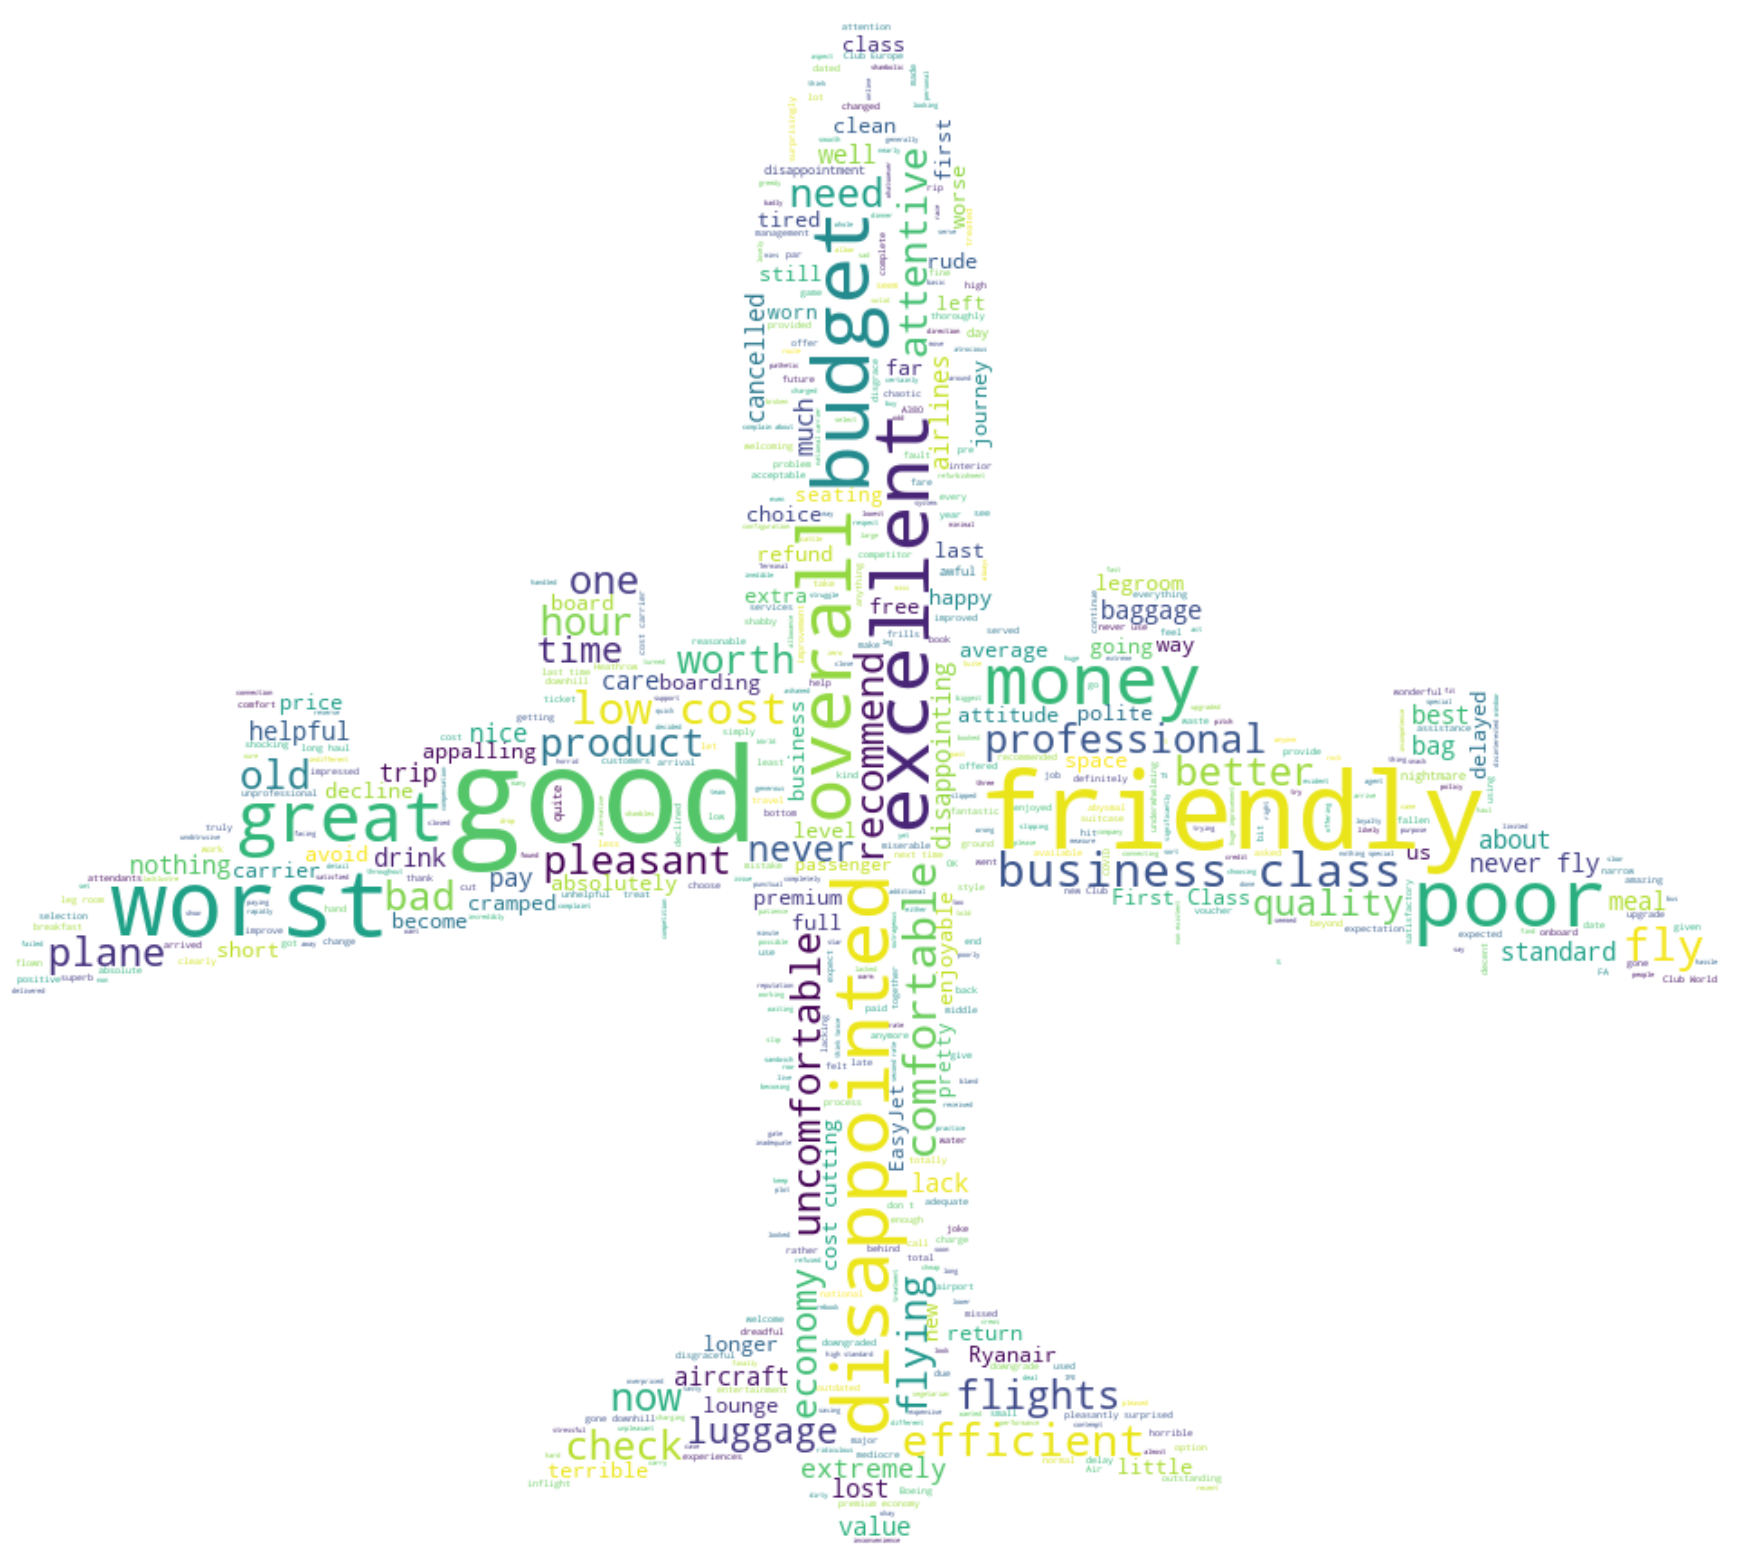

In [105]:
plt.figure(figsize=(40,20))
wc = WordCloud(stopwords=STOPWORDS_extra,
               background_color="white", max_words=2000, mask=mask)
wc.generate(content_review)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

### 2-Opinion Analysis : Based on the Ratings


In [157]:
positive_reviews=''
negative_reviews=''

In [313]:
positive=df[df['Rating']>=5]
negative=df[df['Rating']<5]

In [159]:
positive_reviews=sentence(list(positive['reviews']))
negative_reviews=sentence(list(negative['reviews']))

In [ ]:
#positivie_reviews
mask_like= np.array(Image.open("Downloads\likeee.jpg"))
mask_color=np.array(Image.open('Downloads\green.jpg'))

In [ ]:
image_colors=ImageColorGenerator(mask_color)
wc2=WordCloud(stopwords=STOPWORDS,mask=mask_like,background_color="white",color_func=image_colors,width=20)

In [26]:
wc2.generate(positive_reviews)

In [27]:
#negative_reviews
mask_dislike= np.array(Image.open("Downloads\dislike_2.jpg"))


In [28]:
mask_dislike_color= np.array(Image.open("Downloads\color.jpg"))

In [29]:
image_colour2=ImageColorGenerator(mask_dislike_color)

In [30]:
wc3=WordCloud(stopwords=STOPWORDS,mask=mask_dislike,background_color="white",width=20,color_func=image_colour2)
wc3.generate(negative_reviews)

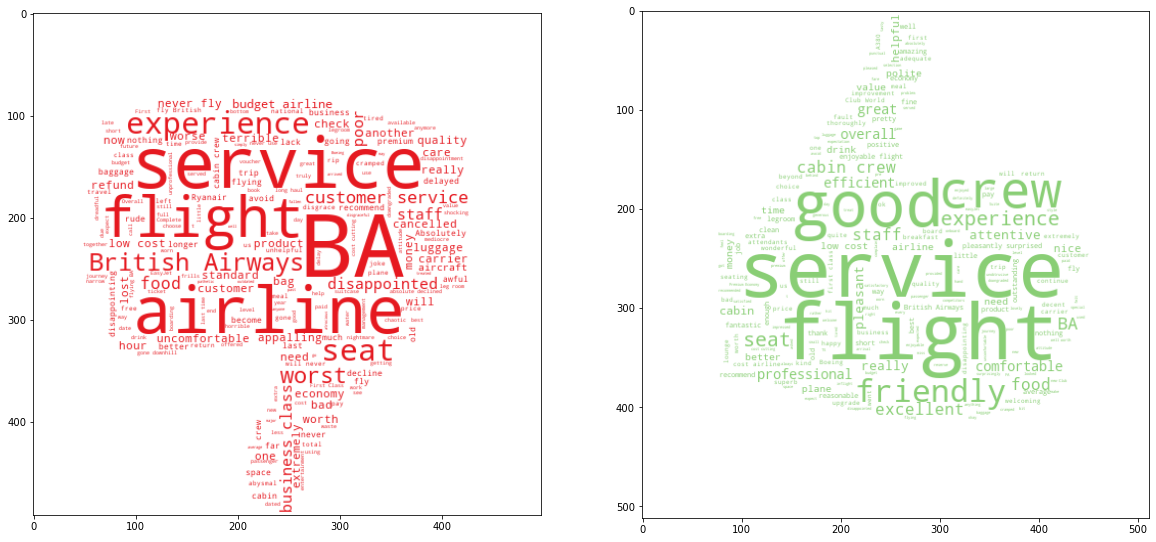

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(wc3, interpolation='bilinear')
axs[1].imshow(wc2, interpolation='bilinear')


### Top negative Reviews 

In [443]:
negative.sort_values(by='Rating').head(100)

,reviews,Rating,publish_year
1,lack customer service,1,2023
847,a total disappointment,1,2018
848,last time fly ba,1,2018
1741,stand wait assistance,1,2016
850,not go receive refund,1,2018
...,...,...,...
642,trip basic,1,2019
643,split family quite far away apart,1,2019
1919,be nightmare experience,1,2016
636,utterly appalling,1,2019


### Top Positive Reviews 

In [315]:
positive.sort_values(by='Rating',ascending=False).head(10)

,reviews,Rating,publish_year
2580,can not fault service,10,2015
760,good short haul flight,10,2019
752,a fantastic flight,10,2019
745,flight good,10,2019
736,staff absolutely delightful,10,2019
735,"impeccable , attentive delightful",10,2019
730,pleasant professional,10,2019
2309,clean efficient,10,2015
719,crew efficient,10,2019
709,service flight superb,10,2019


>>From the previous analysis we did, we can notice some frequent common words which are: service, seat, crew, experience, staff, food,hour... These are mainly the important factors that are responsible for the customer's feeling, either positive or negative.

### Negative, Positive,Neutral Reviews Percentage

In [357]:
print(positive.count())

reviews         1119
Rating          1119
publish_year    1119
dtype: int64


In [358]:
print(negative.count())

reviews         1462
Rating          1462
publish_year    1462
dtype: int64


56% negative review and 44% positive reviews

# V-Preprocessing


In [463]:
df_new=df

In [464]:
stop_words = set(stopwords.words('english'))

In [465]:
df_new['reviews'] =df_new['reviews'].apply(lambda x: " ".join([word for word in x.lower().split() if word not in stop_words]))


In [466]:
#lemmatization and tokennization
nlp=spacy.load('en_core_web_sm')
for i in range(len(df_new['reviews'])):
    text=nlp(df_new['reviews'][i])
    List=[]
    for token in text:
        List.append(token.lemma_)
    if '"' in List:
        List.remove('"')
    if '"' in List:
        List.remove('"')
    my_string = " ".join(List)
    df_new['reviews'][i]=my_string

C:\Users\chene\AppData\Local\Temp\ipykernel_21464\2246918505.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['reviews'][i]=my_string


# VI-Sentiment analysis: Prediction

### Opinion Analysis : Based on the TextBlob pretrained model

In [467]:
List=[]

In [473]:
for i in range(0,len(df)):
    if df['Rating'][i]>5:
        x="pos"
        List.append((df['reviews'][i],x))
    else:
        y="neg"
        List.append((df['reviews'][i],y))

In [474]:
train,test=train_test_split(List,test_size=0.2)


In [475]:
model=NaiveBayesClassifier(train)

In [476]:
print(model.accuracy(test))

0.8257502420135527


In [479]:
for i in range(10,15):
    print(f"{df['reviews'][i]}','{df['Rating'][i]}','{model.classify(List[i])}")

relentless ba cost cutting','4','neg
I recommend british airway','3','neg
absolutely horrible experience','1','neg
this bad airline','1','neg
never fly british airway again','2','neg


# VII-Conclusion

Based on the results, we gained insights into customers' experiences with British Airways and we became aware of the key factors that influence their feelings towards the airline.